In [111]:
# Importing Essential Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt

In [112]:
dir_gis_twn='/Users/dulminiguruge/Documents/Data/Township_shapefiles/townships_all_provinces.geojson'

# GIS Data
gdf_twn=gpd.read_file(dir_gis_twn)



gdf_twn = gpd.GeoDataFrame(
    gdf_twn,
    geometry="geometry",
    crs="EPSG:4326"   # use the CRS your geometries are in
)


# Extract centroid coordinates
gdf_twn['Longitude'] = gdf_twn.geometry.centroid.x
gdf_twn['Latitude'] = gdf_twn.geometry.centroid.y


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_34529/2196246495.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_twn['Longitude'] = gdf_twn.geometry.centroid.x
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_34529/2196246495.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_twn['Latitude'] = gdf_twn.geometry.centroid.y


In [113]:
gdf_twn

,Township,PR,geometry,Longitude,Latitude
0,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",-97.392317,49.044648
1,2-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.45971 49.177...",-97.392334,49.133064
2,3-1-E1,MB,"POLYGON ((-97.45971 49.17726, -97.45964 49.265...",-97.392163,49.221692
3,4-1-E1,MB,"POLYGON ((-97.45964 49.26595, -97.45943 49.354...",-97.391774,49.310310
4,5-1-E1,MB,"POLYGON ((-97.45943 49.35467, -97.45932 49.443...",-97.391514,49.398905
...,...,...,...,...,...
7512,86-13-W6,AB,"POLYGON ((-120.05719 56.44632, -120.05719 56.4...",-119.969907,56.464052
7513,72-14-W6,AB,"POLYGON ((-120.15400 55.21414, -120.15400 55.2...",-120.071212,55.243821
7514,74-14-W6,AB,"POLYGON ((-120.15400 55.38867, -120.15400 55.3...",-120.068385,55.416033
7515,P-A-WS,SK,"POLYGON ((-106.00435 53.13246, -106.00435 53.1...",-105.865879,53.166890


In [114]:
# Save the merged dataframe as a parquet for EDA

df_seeding_climate =pd.read_parquet('/Users/dulminiguruge/Documents/GitHub/crop_stages_detection_2026/data/raw/seeding_dates_&_climate_merged.parquet')
df_seeding_climate

,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD,DOY,Seeding_DOY
0,1-1-W2,2024-04-01,0.000000,-1.049896,1.029205,-0.357300,-1.213226,-1.109955,-1.165436,Dark Brown,2024,0.000000,92,138
1,1-1-W2,2024-04-02,0.000000,-0.211273,5.853180,1.230042,-1.093353,-0.847748,-1.001129,Dark Brown,2024,0.000000,93,138
2,1-1-W2,2024-04-03,0.000000,-0.642914,6.132233,1.036224,-0.820648,-0.646332,-0.759979,Dark Brown,2024,0.000000,94,138
3,1-1-W2,2024-04-04,1.462219,0.071686,8.292389,2.582092,-0.617523,-0.302094,-0.514923,Dark Brown,2024,1.462219,95,138
4,1-1-W2,2024-04-05,2.806824,0.295807,9.219147,3.362732,-0.268402,0.120026,-0.138245,Dark Brown,2024,4.269043,96,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58773,9-32-W1,2025-05-24,6.382599,7.646637,18.124420,12.828735,9.759918,12.602448,10.992310,Black,2025,66.758103,144,148
58774,9-32-W1,2025-05-25,7.472122,6.746979,19.652252,13.358704,10.018463,13.402252,11.716431,Black,2025,74.230225,145,148
58775,9-32-W1,2025-05-26,8.915909,8.960358,20.008210,14.619995,11.406403,14.160553,12.795166,Black,2025,83.146134,146,148
58776,9-32-W1,2025-05-27,9.019836,10.059967,20.257965,15.346283,12.242828,14.741608,13.531738,Black,2025,92.165970,147,148


## Aggregate the data to obtain a single observation per township–year

#### Keep only the pre seeding date climate data

In [115]:
df_pre = df_seeding_climate[df_seeding_climate['DOY'] <= df_seeding_climate['Seeding_DOY']].copy()

#### Compute the mean soil temperature 

In [116]:
soil_cols = [
    'Soil_temp_l1_min',
    'Soil_temp_l1_max',
    'Soil_temp_l1_mean',
    'Soil_temp_l2_min',
    'Soil_temp_l2_max',
    'Soil_temp_l2_mean'
]

soil_means = (
    df_pre
    .groupby(['Township', 'Year'])[soil_cols]
    .mean()
    .reset_index()
)



#### Extract data relevant only to the seeding date of the townships

In [117]:
seeding_day_info = (
    df_seeding_climate[df_seeding_climate['DOY'] == df_seeding_climate['Seeding_DOY']]
    [['Township', 'Year', 'Date', 'Cumulative_GDD', 'Seeding_DOY','SoilType']]
    .drop_duplicates()
)

#### Merge soil means with seeding-day info

In [118]:
df_agg_seeding_climate = soil_means.merge(
    seeding_day_info,
    on=['Township', 'Year'],
    how='left'
)


In [119]:
# One row per township–year
assert df_agg_seeding_climate.groupby(['Township', 'Year']).size().max() == 1

# No missing seeding GDD
df_agg_seeding_climate['Cumulative_GDD'].isna().sum()

0

In [120]:
df_agg_seeding_climate = df_agg_seeding_climate.merge(
    gdf_twn[['Township', 'Longitude', 'Latitude']],
    on="Township",
    how="left"
)

In [121]:
df_agg_seeding_climate.to_parquet('/Users/dulminiguruge/Documents/GitHub/crop_stages_detection_2026/data/processed/aggregated_seeding_dates_&_climate.parquet', index = False)


In [122]:
df_agg_seeding_climate

,Township,Year,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,Date,Cumulative_GDD,Seeding_DOY,SoilType,Longitude,Latitude
0,1-1-W2,2024,3.960586,13.089944,7.802019,5.040384,7.259482,5.997661,2024-05-17,176.216675,138,Dark Brown,-102.073734,49.043142
1,1-1-W2,2025,3.177918,12.671351,6.998692,4.476064,6.773033,5.454980,2025-05-09,71.119003,129,Dark Brown,-102.073734,49.043142
2,1-10-W1,2024,3.530800,11.945325,6.874218,4.178240,6.314601,5.065541,2024-05-17,146.441560,138,Moist Black,-98.739636,49.044182
3,1-10-W1,2025,5.023189,13.699092,8.593812,6.465001,8.845215,7.457578,2025-05-26,152.201324,146,Moist Black,-98.739636,49.044182
4,1-10-W2,2024,3.986141,13.811825,8.089683,5.083171,7.359984,6.084133,2024-05-16,193.563369,137,Dark Brown,-103.275477,49.043042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,9-22-W2,2024,3.842672,13.672552,7.886018,5.014152,7.306414,6.030634,2024-05-17,177.021667,138,Brown,-104.919660,49.741045
1223,9-25-W4,2025,2.638684,12.941293,6.848000,4.472846,6.600827,5.439670,2025-05-03,88.282425,123,Moist Dark Brown,-113.321119,49.742269
1224,9-26-W4,2025,2.157290,12.768448,6.452752,4.129984,6.371424,5.161006,2025-05-03,82.249816,123,Moist Dark Brown,-113.456792,49.742269
1225,9-32-W1,2024,5.413265,13.593945,8.892028,6.612388,8.668982,7.515864,2024-06-13,335.131348,165,Black,-101.758974,49.753862


In [123]:
df_agg_seeding_climate

,Township,Year,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,Date,Cumulative_GDD,Seeding_DOY,SoilType,Longitude,Latitude
0,1-1-W2,2024,3.960586,13.089944,7.802019,5.040384,7.259482,5.997661,2024-05-17,176.216675,138,Dark Brown,-102.073734,49.043142
1,1-1-W2,2025,3.177918,12.671351,6.998692,4.476064,6.773033,5.454980,2025-05-09,71.119003,129,Dark Brown,-102.073734,49.043142
2,1-10-W1,2024,3.530800,11.945325,6.874218,4.178240,6.314601,5.065541,2024-05-17,146.441560,138,Moist Black,-98.739636,49.044182
3,1-10-W1,2025,5.023189,13.699092,8.593812,6.465001,8.845215,7.457578,2025-05-26,152.201324,146,Moist Black,-98.739636,49.044182
4,1-10-W2,2024,3.986141,13.811825,8.089683,5.083171,7.359984,6.084133,2024-05-16,193.563369,137,Dark Brown,-103.275477,49.043042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,9-22-W2,2024,3.842672,13.672552,7.886018,5.014152,7.306414,6.030634,2024-05-17,177.021667,138,Brown,-104.919660,49.741045
1223,9-25-W4,2025,2.638684,12.941293,6.848000,4.472846,6.600827,5.439670,2025-05-03,88.282425,123,Moist Dark Brown,-113.321119,49.742269
1224,9-26-W4,2025,2.157290,12.768448,6.452752,4.129984,6.371424,5.161006,2025-05-03,82.249816,123,Moist Dark Brown,-113.456792,49.742269
1225,9-32-W1,2024,5.413265,13.593945,8.892028,6.612388,8.668982,7.515864,2024-06-13,335.131348,165,Black,-101.758974,49.753862


## EDA of the aggregated seeding date and climate data

#### Distribution of Seeding_DOY

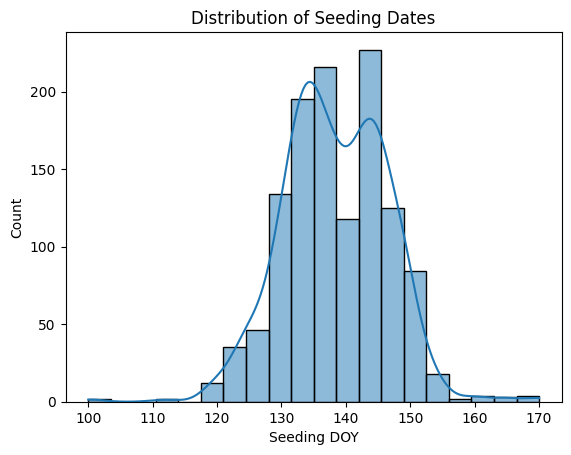

In [124]:


sns.histplot(df_agg_seeding_climate['Seeding_DOY'], bins=20, kde=True)
plt.xlabel("Seeding DOY")
plt.title("Distribution of Seeding Dates")
plt.show()


In [125]:
df = df_agg_seeding_climate.copy()
# Numerical summary
df_agg_seeding_climate.describe()

,Year,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,Date,Cumulative_GDD,Seeding_DOY,Longitude,Latitude
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227,1227.000000,1227.000000,1227.000000,1227.000000
mean,2024.569682,3.210838,11.433409,6.577415,4.301578,6.225104,5.134633,2024-12-11 20:06:27.286063616,112.652892,138.334148,-106.102572,51.694230
min,2024.000000,0.172330,0.501087,0.304805,0.224714,0.339747,0.266575,2024-05-02 00:00:00,-37.072571,100.000000,-119.952007,49.042948
25%,2024.000000,2.643848,10.264339,5.739259,3.477089,5.249218,4.227009,2024-05-22 00:00:00,69.847802,133.000000,-108.810051,50.440730
50%,2025.000000,3.159627,11.425781,6.530181,4.245990,6.167611,5.071958,2025-05-08 00:00:00,112.872925,138.000000,-105.414224,51.576369
75%,2025.000000,3.809434,12.654424,7.391358,5.083029,7.176490,5.996365,2025-05-16 00:00:00,150.714377,144.000000,-102.926732,52.885403
max,2025.000000,6.949102,16.698458,10.800354,8.634661,11.001221,9.658460,2025-06-16 00:00:00,391.193897,170.000000,-96.984864,56.726337
std,0.495322,0.910789,1.686293,1.199150,1.180203,1.393774,1.271679,NaN,57.553770,8.089376,4.326526,1.582803


In [126]:
# Categorical summary
df.describe(include='object')


,Township,SoilType
count,1227,1227
unique,1017,7
top,1-1-W2,Moist Black
freq,2,358


In [127]:
# Missing values check
# Count missing values
df.isna().sum()

Township             0
Year                 0
Soil_temp_l1_min     0
Soil_temp_l1_max     0
Soil_temp_l1_mean    0
Soil_temp_l2_min     0
Soil_temp_l2_max     0
Soil_temp_l2_mean    0
Date                 0
Cumulative_GDD       0
Seeding_DOY          0
SoilType             0
Longitude            0
Latitude             0
dtype: int64

In [128]:
categorical_cols = [ 'SoilType', 'Year']

for col in categorical_cols:
    print(f"\n{col} unique values:")
    print(df[col].value_counts())


SoilType unique values:
SoilType
Moist Black         358
Black               349
Dark Brown          185
Gray                118
Moist Dark Brown    100
Brown                76
Dark Gray            41
Name: count, dtype: int64

Year unique values:
Year
2025    699
2024    528
Name: count, dtype: int64


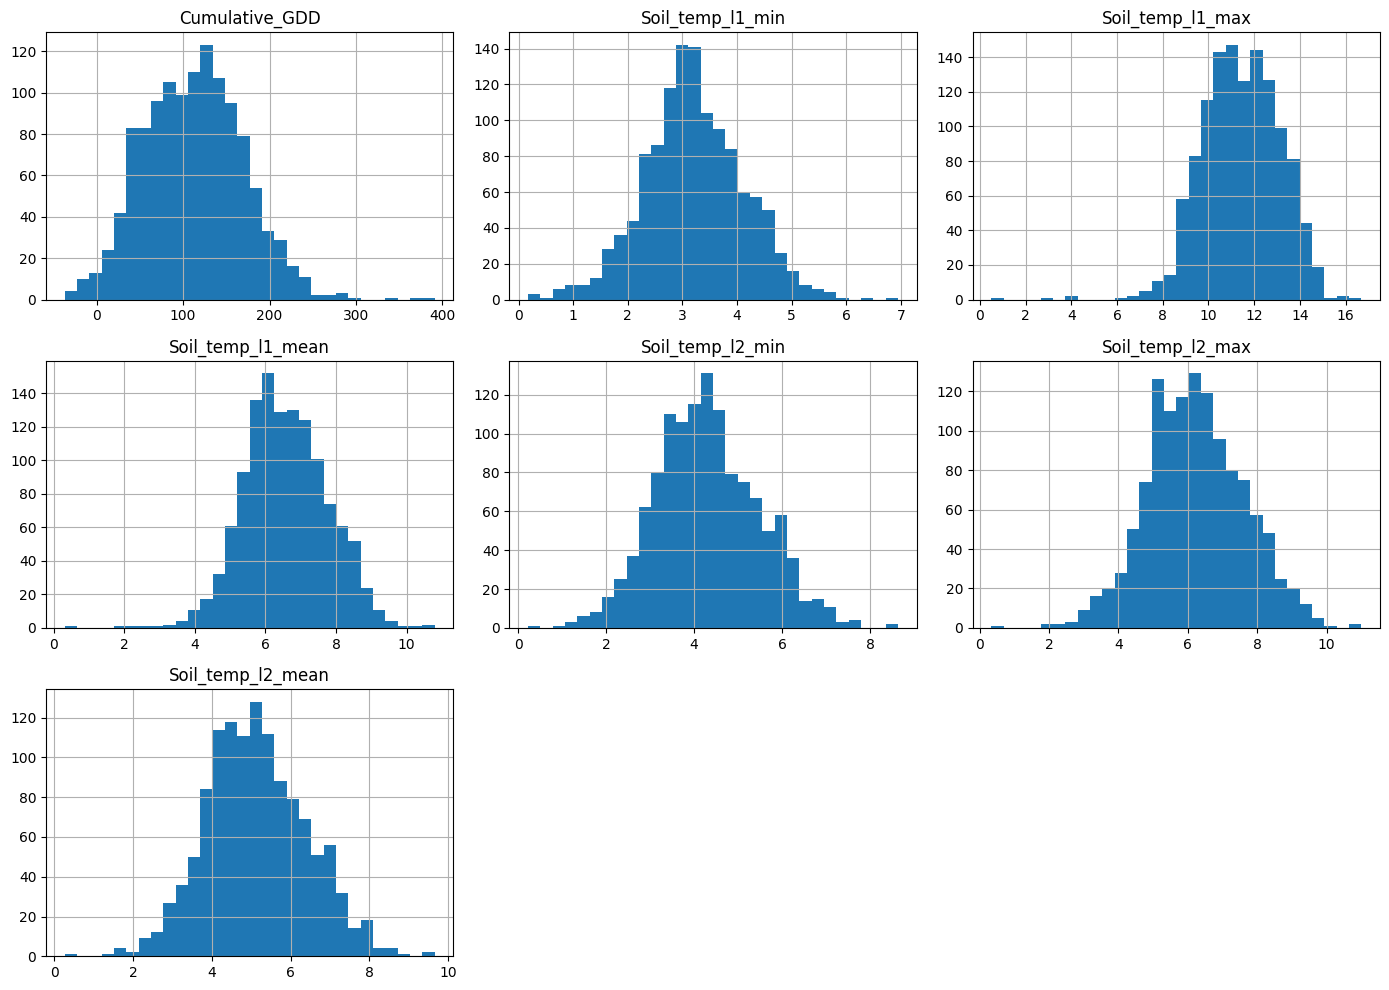

In [129]:
num_cols = [
     'Cumulative_GDD',
    'Soil_temp_l1_min', 'Soil_temp_l1_max', 'Soil_temp_l1_mean',
    'Soil_temp_l2_min', 'Soil_temp_l2_max', 'Soil_temp_l2_mean'
]

df[num_cols].hist(bins=30, figsize=(14, 10))
plt.tight_layout()
plt.show()


## Visualization of the aggregated dataset

#### Merge the aggregated dataset with township geometry columns

In [130]:
gdf_twn.head()

,Township,PR,geometry,Longitude,Latitude
0,1-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",-97.392317,49.044648
1,2-1-E1,MB,"POLYGON ((-97.45994 49.08858, -97.45971 49.177...",-97.392334,49.133064
2,3-1-E1,MB,"POLYGON ((-97.45971 49.17726, -97.45964 49.265...",-97.392163,49.221692
3,4-1-E1,MB,"POLYGON ((-97.45964 49.26595, -97.45943 49.354...",-97.391774,49.310310
4,5-1-E1,MB,"POLYGON ((-97.45943 49.35467, -97.45932 49.443...",-97.391514,49.398905


In [131]:
df_seed = df_agg_seeding_climate.copy()

In [132]:
gdf_twn.columns

Index(['Township', 'PR', 'geometry', 'Longitude', 'Latitude'], dtype='object')

In [133]:
gdf = gdf_twn[['Township','geometry']].merge(
    df_seed,
    on="Township",
    how="left"
)


In [134]:
gdf

,Township,geometry,Year,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,Date,Cumulative_GDD,Seeding_DOY,SoilType,Longitude,Latitude
0,1-1-E1,"POLYGON ((-97.45994 49.08858, -97.42614 49.088...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,2-1-E1,"POLYGON ((-97.45994 49.08858, -97.45971 49.177...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,3-1-E1,"POLYGON ((-97.45971 49.17726, -97.45964 49.265...",2024.0,4.408519,12.778310,7.853462,5.500294,7.264698,6.238620,2024-05-15,160.602829,136.0,Moist Black,-97.392163,49.221692
3,4-1-E1,"POLYGON ((-97.45964 49.26595, -97.45943 49.354...",2024.0,4.310363,12.606858,7.722116,5.331392,7.076026,6.056515,2024-05-15,158.791504,136.0,Moist Black,-97.391774,49.310310
4,5-1-E1,"POLYGON ((-97.45943 49.35467, -97.45932 49.443...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722,86-13-W6,"POLYGON ((-120.05719 56.44632, -120.05719 56.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7723,72-14-W6,"POLYGON ((-120.15400 55.21414, -120.15400 55.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7724,74-14-W6,"POLYGON ((-120.15400 55.38867, -120.15400 55.3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7725,P-A-WS,"POLYGON ((-106.00435 53.13246, -106.00435 53.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


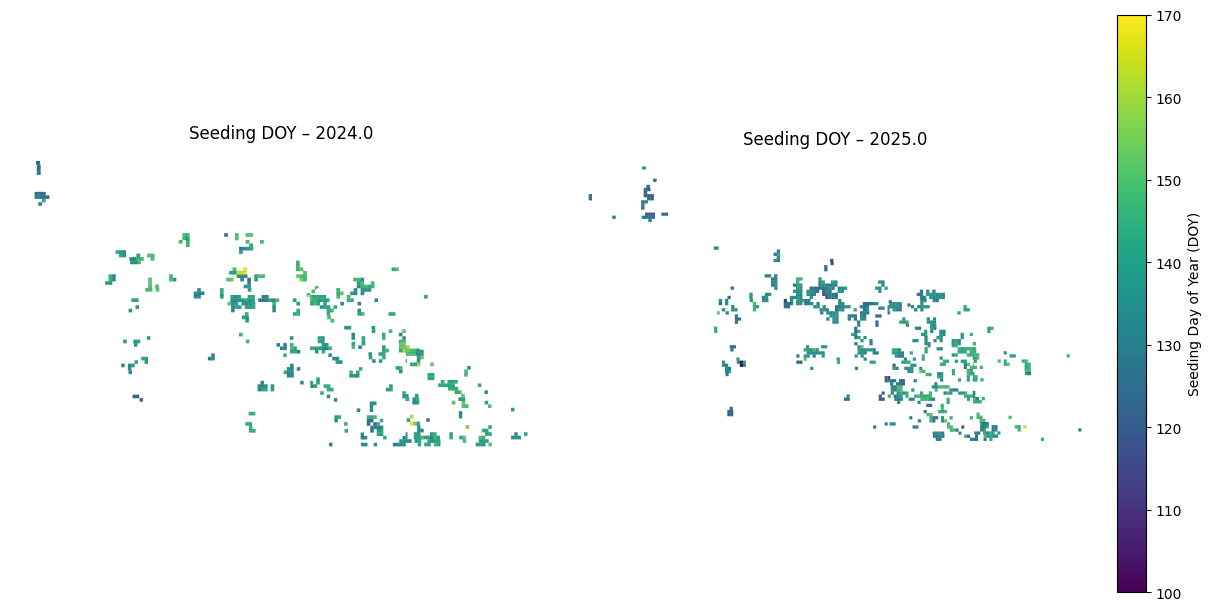

In [135]:
import matplotlib.pyplot as plt
import math

# Get sorted list of years
years = sorted(gdf['Year'].dropna().unique())
n_years = len(years)

# Layout settings
cols = min(4, n_years)        # max 4 maps per row
rows = math.ceil(n_years / cols)

# Shared color scale
vmin = gdf['Seeding_DOY'].min()
vmax = gdf['Seeding_DOY'].max()

fig, axes = plt.subplots(
    rows, cols,
    figsize=(6 * cols, 6 * rows),
    constrained_layout=True
)

# Flatten axes for easy iteration
axes = axes.flatten()

for ax, year in zip(axes, years):
    gdf[gdf['Year'] == year].plot(
        column='Seeding_DOY',
        cmap='viridis',
        linewidth=0.05,
        edgecolor='black',
        vmin=vmin,
        vmax=vmax,
        legend=False,
        ax=ax,
        missing_kwds={
            "color": "lightgrey"
        }
    )

    ax.set_title(f"Seeding DOY – {year}")
    ax.axis('off')

# Remove unused axes
for ax in axes[len(years):]:
    ax.remove()

# Add ONE shared colorbar
sm = plt.cm.ScalarMappable(
    cmap='viridis',
    norm=plt.Normalize(vmin=vmin, vmax=vmax)
)
sm._A = []

cbar = fig.colorbar(
    sm,
    ax=axes,
    fraction=0.03,
    pad=0.01
)
cbar.set_label("Seeding Day of Year (DOY)")

plt.show()


In [136]:
import matplotlib.pyplot as plt
import math

def plot_variable_by_year(
    gdf,
    value_col,
    title_label=None,
    cmap="viridis",
    cols=4
):
    years = sorted(gdf['Year'].dropna().unique())
    n = len(years)
    rows = math.ceil(n / cols)

    vmin = gdf[value_col].min()
    vmax = gdf[value_col].max()

    fig, axes = plt.subplots(
        rows, cols,
        figsize=(6 * cols, 6 * rows),
        constrained_layout=True
    )

    axes = axes.flatten()

    used_axes = []

    for ax, year in zip(axes, years):
        gdf[gdf['Year'] == year].plot(
            column=value_col,
            cmap=cmap,
            linewidth=0.05,
            edgecolor='black',
            vmin=vmin,
            vmax=vmax,
            legend=False,
            ax=ax,
            missing_kwds={"color": "lightgrey"}
        )

        ax.set_title(f"{title_label or value_col} – {year}")
        ax.axis('off')
        used_axes.append(ax)

    # Remove unused axes safely
    for ax in axes[len(years):]:
        fig.delaxes(ax)

    # Create shared colorbar using ONLY valid axes
    sm = plt.cm.ScalarMappable(
        cmap=cmap,
        norm=plt.Normalize(vmin=vmin, vmax=vmax)
    )
    sm._A = []

    cbar = fig.colorbar(
        sm,
        ax=used_axes,
        fraction=0.03,
        pad=0.01
    )
    cbar.set_label(title_label or value_col)

    plt.show()


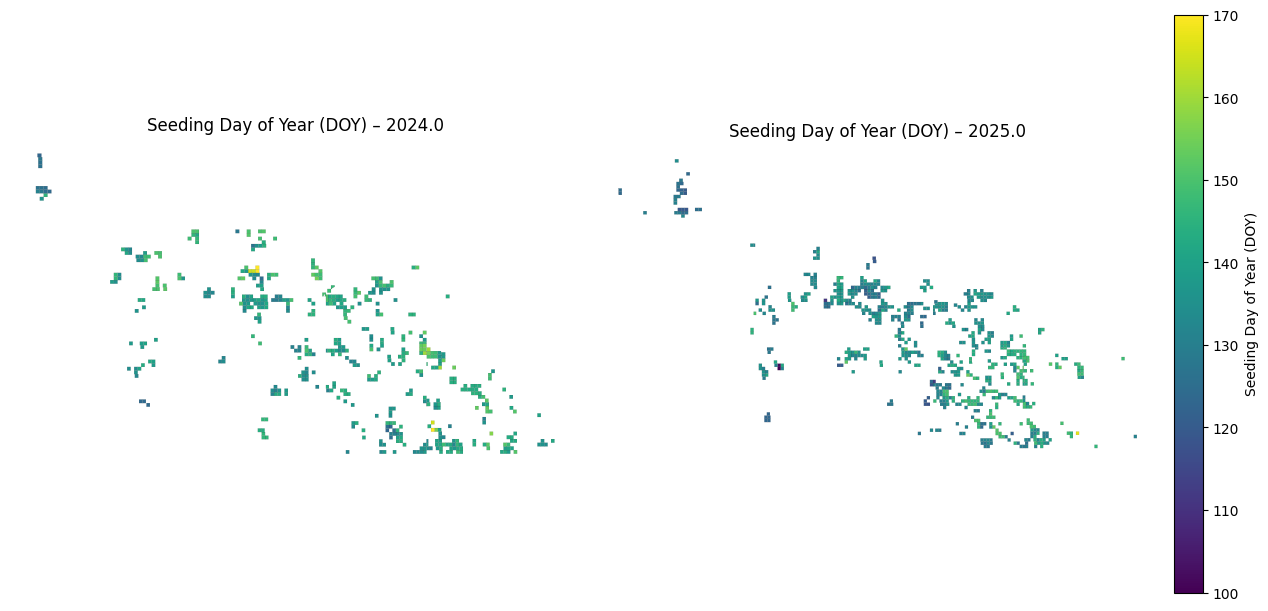

In [137]:
plot_variable_by_year(
    gdf,
    value_col="Seeding_DOY",
    title_label="Seeding Day of Year (DOY)",
    cmap="viridis"
)


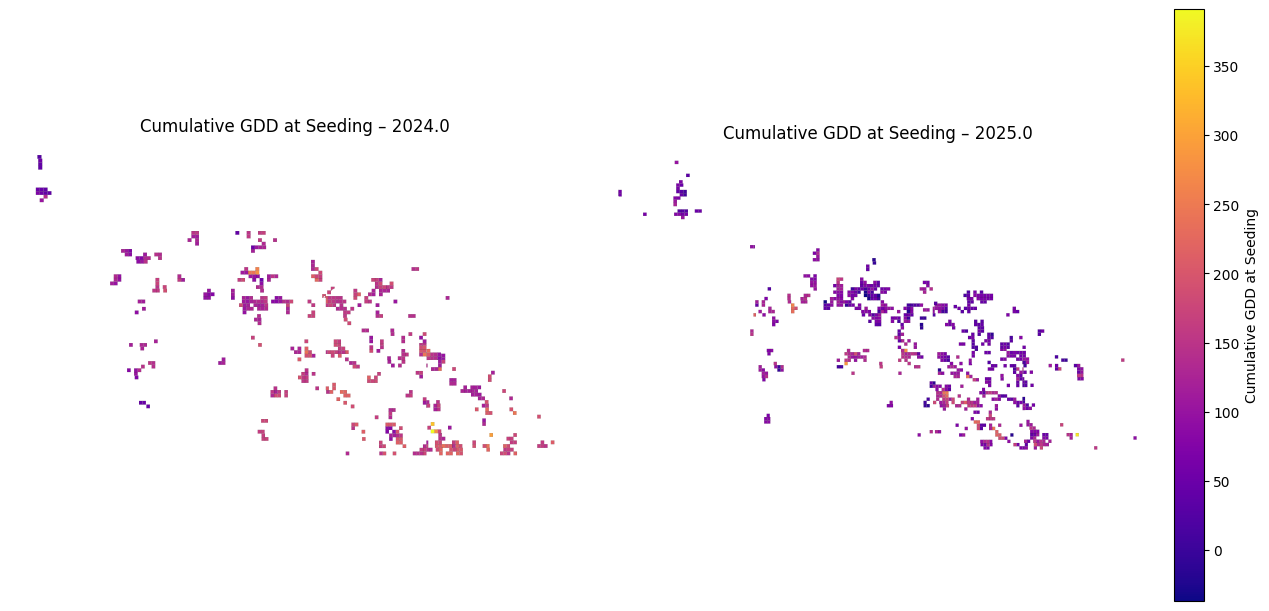

In [138]:
plot_variable_by_year(
    gdf,
    value_col="Cumulative_GDD",
    title_label="Cumulative GDD at Seeding",
    cmap="plasma"
)


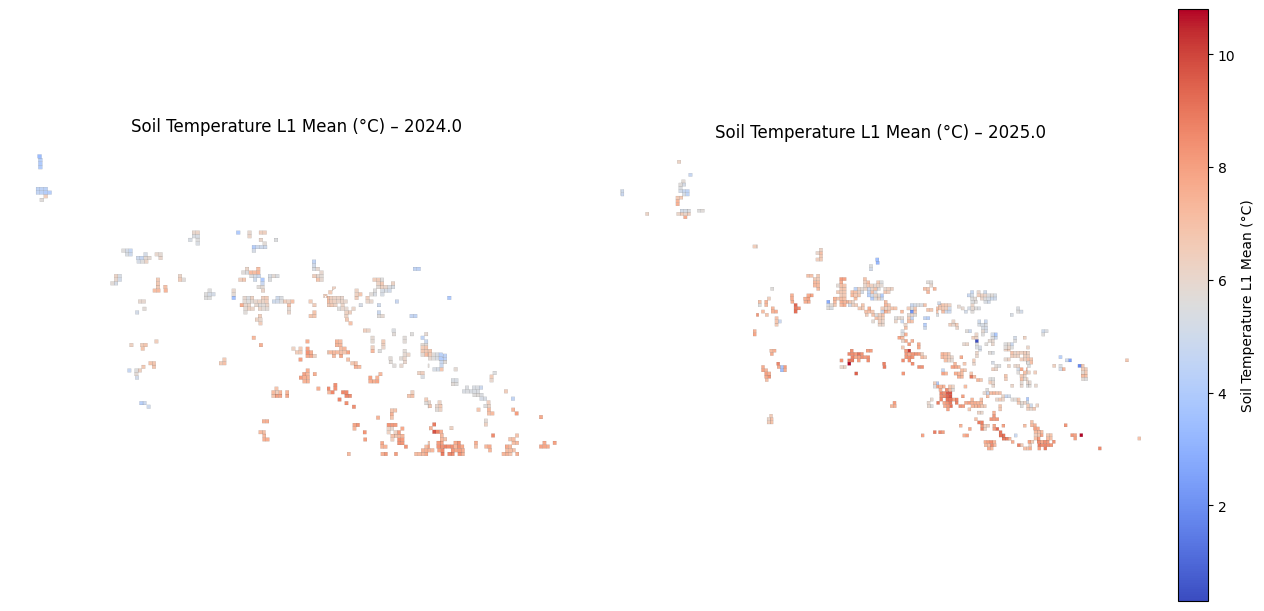

In [139]:
plot_variable_by_year(
    gdf,
    value_col="Soil_temp_l1_mean",
    title_label="Soil Temperature L1 Mean (°C)",
    cmap="coolwarm"
)
